<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/1c2025/ClaseApoyo20250325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mi Titulo

Hola, como te va

## Cosa 1

Hola tambien

In [ ]:
# una lista
A = [1, 3, 4, 5, 7, 10, 0]

# ver lista
print(A)

[1, 3, 4, 5, 7, 10, 0]


In [ ]:
# un vector
import numpy as np

B = np.array(A)

# ver vector
print(B)

[ 1  3  4  5  7 10  0]


In [ ]:
# las dimensiones de mi vector
B.shape

print(B.shape) # es un vector (1D)

(7,)


In [ ]:
print(3>4)

False


In [ ]:
print(bool(1))

True


In [ ]:
print(B>3)

print(B<6)

[False False  True  True  True  True False]
[ True  True  True  True False False  True]


In [ ]:
# Cumplir las dos condiciones
print((B>3) & (B<6)) # ejemplo, probabilidad conjunta
c = np.mean((B>3) & (B<6))

print(np.mean((B>3) & (B<6)))

# redondeo
print('La probabilidad de B>3 y B<6 es',np.round(c*100, 0),'%')

[False False  True  True False False False]
0.2857142857142857
La probabilidad de B>3 y B<6 es 29.0 %


P(B>3|B<6)

In [ ]:
print(B[0:3]) # nota: el ultimo excluyente

[1 3 4]


In [ ]:
B[[1,-1,0]]

array([3, 0, 1])

In [ ]:
print(B)

filtro = B<6 # la condicion que quiero cumplir
print(filtro)

B_cond = B[filtro] # aplicar el filtro (booleanos) a mi vector

print(B_cond) # valores que cumplen condicion

# la probabilidad (condicionada)
#print(np.mean(B_cond>3))

[ 1  3  4  5  7 10  0]
[ True  True  True  True False False  True]
[1 3 4 5 0]


In [ ]:
P_cond = np.mean(B[B<6]>3)

print('La probabilidad de B>3 dado B<6 es',np.round(P_cond*100, 0),'%')

La probabilidad de B>3 dado B<6 es 40.0 %


In [ ]:
# cuantos verdaderos
np.sum(B>3)

print(np.sum(B>3))

4


In [ ]:
# Probabilidad
P = np.sum(B>3)/len(B)

print(P)

print(np.mean(B>3))

0.5714285714285714
0.5714285714285714


In [ ]:
# crear funciones Y = x^2
def Y(x):
    # funcion que eleva al cuadrado
    y_val = x**2
    return y_val # la potencia es **


In [ ]:
print(Y(4))

16


In [ ]:
# crear funcion simple Y = X**2
Y2 = lambda z: z**2 # esto es una funcion de x

print(Y2(4))

16


In [ ]:
# el valor medio (por definicion) p(x) -->
# es la integral extendida al dominio x*p(x)*dx

#integrarles "analiticas" en python
import scipy as sp

# hagamos la integral de x*Y(x) entre 0 y 10 --> 10^4/4 = 2500
Int, err = sp.integrate.quad(lambda x: x*Y(x), 0, 10)

# varianza: integral extendida al domnio de (x-mu)**2 * p(x) * dx

# NOTA: El infinito np.inf en python

print(Int)

2500.0000000000005


In [ ]:
def Plano(x,y):
  Z = 10*x+5*y
  return Z

La integral de Z entre X = [0,Y] con Y [-5,10]

*   Qué es en planta? --> Un triangulo



In [ ]:
Int, err = sp.integrate.dblquad(lambda x,y: Plano(x,y),-5,10,0,lambda y: y)

print(Int)

3750.0


# Parte II (25/03/2025)

In [ ]:
import numpy as np
import scipy as sp
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fun = lambda x: x**2+2*x-3

In [ ]:
# vector en la que voy a evaluar fun(x)
x_vec = np.linspace(0,10,21)

# equiespaciado logaritmico (de 1e-5 a 1e1)
#x_vec = np.logspace(-5,1,21)

print(x_vec)

fun_vec = fun(x_vec)

print(fun_vec)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
[ -3.    -1.75   0.     2.25   5.     8.25  12.    16.25  21.    26.25
  32.    38.25  45.    52.25  60.    68.25  77.    86.25  96.   106.25
 117.  ]


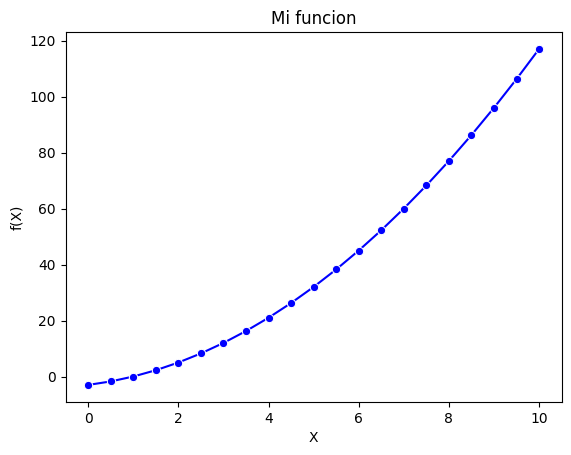

In [ ]:
sns.lineplot(x=x_vec, y=fun_vec,color='b',marker='o').set(title='Mi funcion',xlabel='X',ylabel='f(X)')
plt.show()

In [ ]:
# simulaciones de una distribucion de poisson
Sim_PO = st.poisson(mu=3).rvs(size=10000)

print(Sim_PO)

[3 2 5 ... 4 2 2]


<Axes: ylabel='Count'>

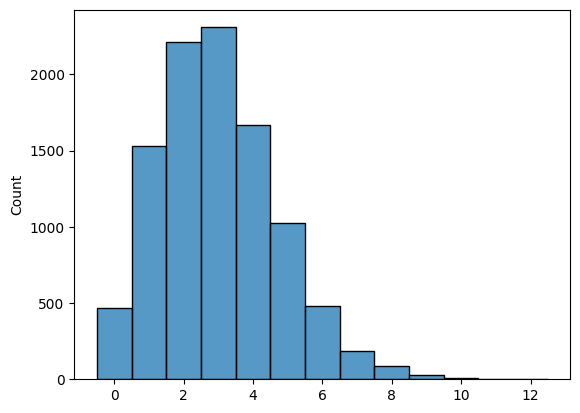

In [ ]:
# histograma
sns.histplot(x=Sim_PO,discrete=True)

<Axes: ylabel='Probability'>

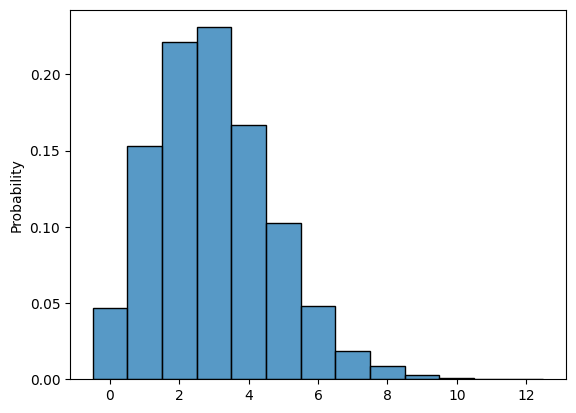

In [ ]:
# histograma
sns.histplot(x=Sim_PO,discrete=True,stat='probability')

<Axes: ylabel='Probability'>

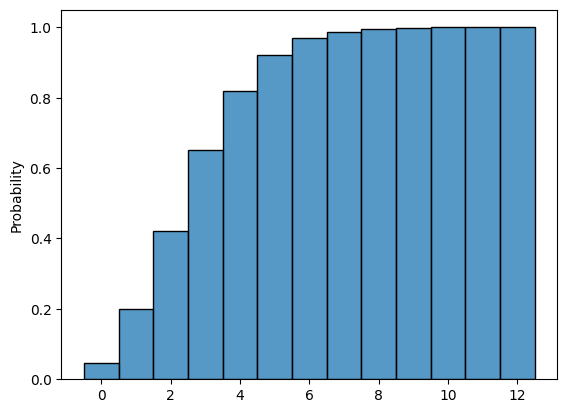

In [ ]:
# histograma empirico de probabilidad acumulada
sns.histplot(x=Sim_PO,discrete=True,stat='probability',cumulative=True)

In [ ]:
# simulando una normal
Sim_Norm = st.norm(loc=1,scale=0.05).rvs(size=10000)

print(Sim_Norm)

[1.00166751 0.99053841 1.01381214 ... 1.00001564 1.04588799 0.92946395]


<Axes: ylabel='Density'>

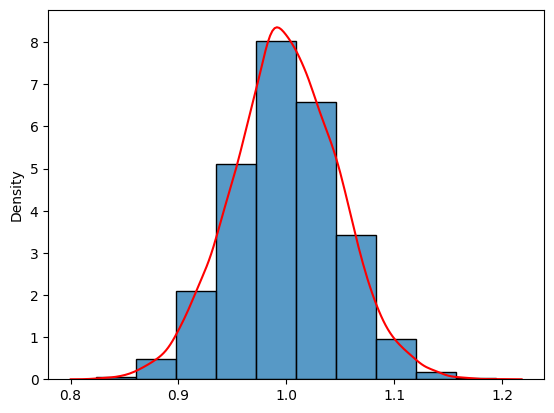

In [ ]:
sns.histplot(x=Sim_Norm,bins=10,stat='density')
sns.kdeplot(x=Sim_Norm,color='r')

(0.5, 1.5)

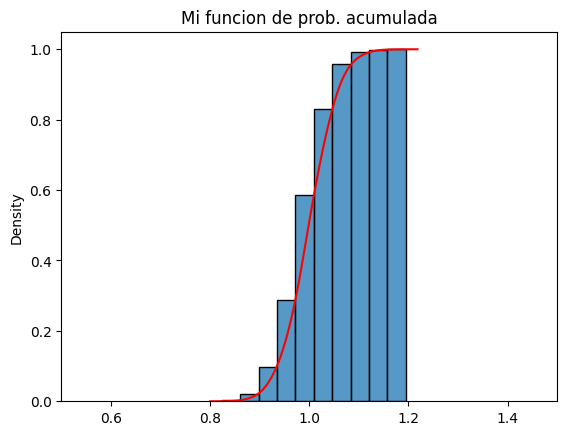

In [ ]:
sns.histplot(x=Sim_Norm,bins=10,stat='density',cumulative=True)
sns.kdeplot(x=Sim_Norm,color='r',cumulative=True)
plt.title('Mi funcion de prob. acumulada')
plt.xlim(0.5,1.5)

0.966806635304271


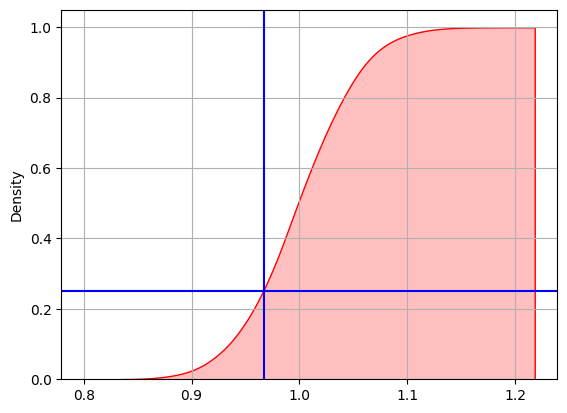

In [ ]:


# cuanti P25
P25 = np.quantile(Sim_Norm,0.25)
print(P25)

sns.kdeplot(x=Sim_Norm,color='r',fill=True,cumulative=True)
plt.axvline(x=P25,color='b')
plt.axhline(y=0.25,color='b')
plt.grid(True)